<a href="https://colab.research.google.com/github/rookie-huang/car_game/blob/master/yolo3_puke_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://doc-0o-3c-docs.googleusercontent.com/docs/securesc/4ti0bct7pf1ncug7s8gqc6o367683qv9/e86ngle81smrokpd32nkon9thoabbl1j/1591755750000/00959379109297615294/16314357516811656753/1I92QB0ifKoEOZcUq6gAfay-o4Tjw1xTU?e=download&authuser=0

--2020-06-14 01:26:35--  https://doc-0o-3c-docs.googleusercontent.com/docs/securesc/4ti0bct7pf1ncug7s8gqc6o367683qv9/e86ngle81smrokpd32nkon9thoabbl1j/1591755750000/00959379109297615294/16314357516811656753/1I92QB0ifKoEOZcUq6gAfay-o4Tjw1xTU?e=download
Resolving doc-0o-3c-docs.googleusercontent.com (doc-0o-3c-docs.googleusercontent.com)... 74.125.143.132, 2a00:1450:4013:c03::84
Connecting to doc-0o-3c-docs.googleusercontent.com (doc-0o-3c-docs.googleusercontent.com)|74.125.143.132|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2020-06-14 01:26:35 ERROR 403: Forbidden.



In [2]:
!git clone https://github.com/itheima1/yolo-puke.git

fatal: destination path 'yolo-puke' already exists and is not an empty directory.


In [3]:
%cd yolo-puke/

/content/yolo-puke


In [4]:
!mkdir ./data/dataset/
!mkdir ./data/dataset/train/
!mkdir ./data/dataset/test/


mkdir: cannot create directory ‘./data/dataset/’: File exists
mkdir: cannot create directory ‘./data/dataset/train/’: File exists
mkdir: cannot create directory ‘./data/dataset/test/’: File exists


In [0]:
!python generate_test.py

In [0]:
!python generate_train.py

In [7]:
!python train.py

流式输出内容被截断，只能显示最后 5000 行内容。
=> STEP 2502   lr: 0.000812   giou_loss: 3.49   conf_loss: 1.17   prob_loss: 14.04   total_loss: 18.70
=> STEP 2503   lr: 0.000811   giou_loss: 3.61   conf_loss: 1.27   prob_loss: 16.67   total_loss: 21.55
=> STEP 2504   lr: 0.000811   giou_loss: 3.85   conf_loss: 1.17   prob_loss: 15.29   total_loss: 20.31
=> STEP 2505   lr: 0.000811   giou_loss: 3.50   conf_loss: 0.68   prob_loss: 10.32   total_loss: 14.50
=> STEP 2506   lr: 0.000811   giou_loss: 3.91   conf_loss: 1.02   prob_loss: 16.56   total_loss: 21.49
=> STEP 2507   lr: 0.000811   giou_loss: 3.46   conf_loss: 1.31   prob_loss: 7.52   total_loss: 12.29
=> STEP 2508   lr: 0.000811   giou_loss: 4.05   conf_loss: 2.16   prob_loss: 13.81   total_loss: 20.02
=> STEP 2509   lr: 0.000810   giou_loss: 2.92   conf_loss: 1.12   prob_loss: 5.85   total_loss: 9.89
=> STEP 2510   lr: 0.000810   giou_loss: 3.08   conf_loss: 1.06   prob_loss: 9.04   total_loss: 13.18
=> STEP 2511   lr: 0.000810   giou_loss: 3.26   co

In [0]:
import time
for i in range(0,3600):
  print('hh')
  time.sleep(5)

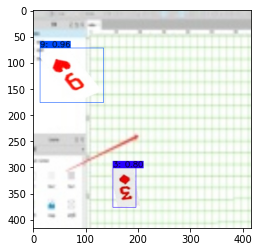

In [14]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import cv2
import numpy as np
import core.utils as utils
import tensorflow as tf
from core.yolov3 import YOLOv3, decode
from PIL import Image
import matplotlib.pyplot as plt


input_size   = 416
image_path   = "./data/dataset/test/1.jpg"

input_layer  = tf.keras.layers.Input([input_size, input_size, 3])
feature_maps = YOLOv3(input_layer)

original_image      = cv2.imread(image_path)
original_image      = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
original_image_size = original_image.shape[:2]

image_data = utils.image_preporcess(np.copy(original_image), [input_size, input_size])
image_data = image_data[np.newaxis, ...].astype(np.float32)

# Build Model
INPUT_SIZE   = 416
input_layer  = tf.keras.layers.Input([INPUT_SIZE, INPUT_SIZE, 3])
feature_maps = YOLOv3(input_layer)

bbox_tensors = []
for i, fm in enumerate(feature_maps):
    bbox_tensor = decode(fm, i)
    bbox_tensors.append(bbox_tensor)

model = tf.keras.Model(input_layer, bbox_tensors)
model.load_weights("./puke6")
#model.summary()

pred_bbox = model.predict(image_data)
pred_bbox = [tf.reshape(x, (-1, tf.shape(x)[-1])) for x in pred_bbox]
pred_bbox = tf.concat(pred_bbox, axis=0)
bboxes = utils.postprocess_boxes(pred_bbox, original_image_size, input_size, 0.7)
bboxes = utils.nms(bboxes, 0.45, method='nms')

image = utils.draw_bbox(original_image, bboxes)
image = Image.fromarray(image)
plt.imshow(image)

